In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display basic info
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Check unique values in target
print("\nChurn value counts:\n", df['Churn'].value_counts())

Dataset shape: (7043, 21)

Column names: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...        

In [9]:
df.drop('customerID', axis=1, inplace=True)

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_22628\266577964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [11]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [12]:
binary_cols = [col for col in df.columns 
               if df[col].nunique() == 2 and df[col].dtype == 'object']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

In [13]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df.drop("Churn",axis=1)
y=df['Churn']

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)


print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Accuracy: 0.8041163946061036


C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


from sklearn.linear_model import RandomForestClassifier
rf=RandomForestClassifier(n_estimator=100,random_state=42)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.78708303761533


In [20]:
from sklearn.metrics import roc_auc_score

print("ROC-AUC (LR):", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))
print("ROC-AUC (RF):", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

ROC-AUC (LR): 0.8425534113513653
ROC-AUC (RF): 0.8215234183264873


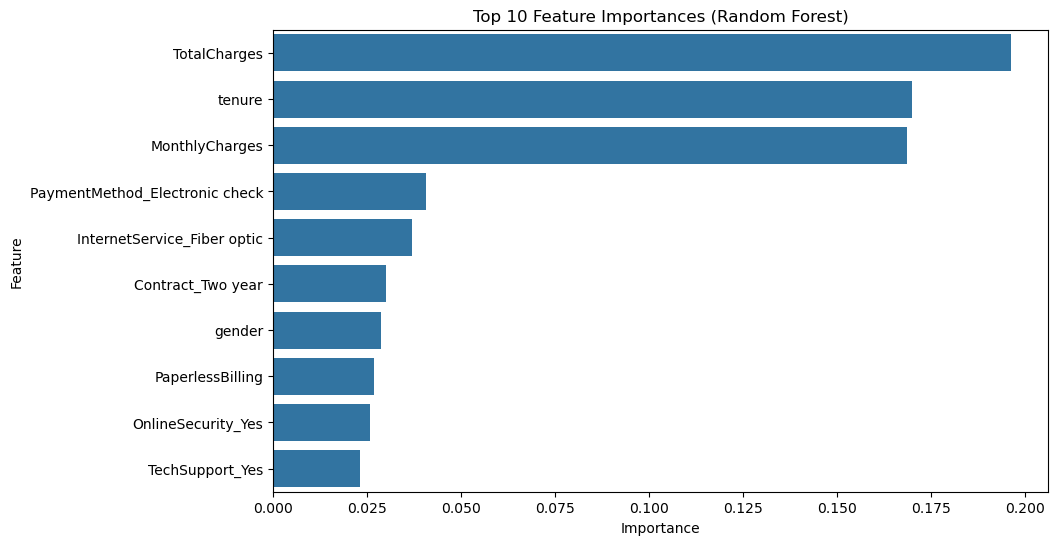

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

importances=rf.feature_importances_
feat_names=X.columns
feat_df=pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df= feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [22]:
# Make sure test set has the same columns as training
X_test_fixed = pd.get_dummies(X_test)

# Align columns with training set
X_test_fixed = X_test_fixed.reindex(columns=X.columns, fill_value=0)

# Force numeric dtype
X_test_fixed = X_test_fixed.astype(float)


In [23]:
# Make sure all columns are numeric
X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')

# Fill any NaNs created during coercion
X_test_numeric = X_test_numeric.fillna(0)




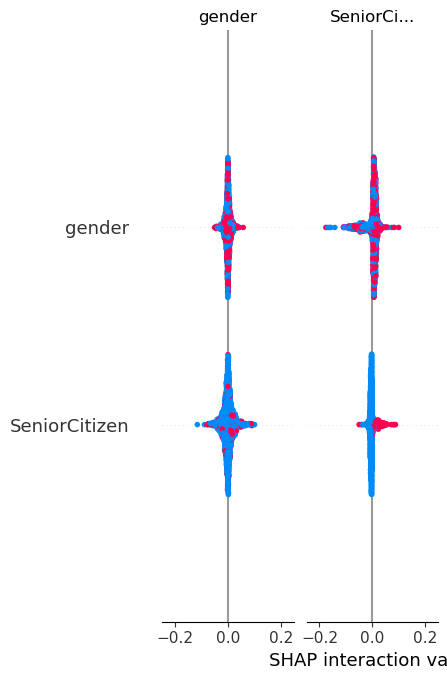

In [24]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_fixed)

shap.summary_plot(shap_values, X_test_fixed)

In [25]:
import joblib

joblib.dump(rf, "churn_model.pkl")

['churn_model.pkl']

In [26]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Preprocessing for numerical data
numeric_transformer = StandardScaler()

# Combine into column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Build pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

# Train pipeline
pipeline.fit(X, y)

# Save pipeline
joblib.dump(pipeline, "churn_pipeline.pkl")
print("✅ Pipeline saved as churn_pipeline.pkl")


✅ Pipeline saved as churn_pipeline.pkl
